In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import os
from pathlib import Path

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
# Now any plots you create will use Arial as the default font

### Figure 1. B

In [3]:
data = pd.read_csv('1024_meric_masked_final_result.csv')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

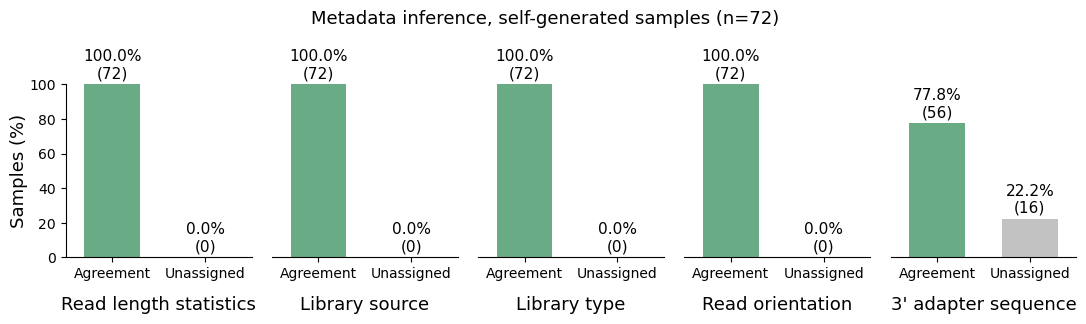

In [4]:
# List of 'match' columns
match_columns = ['match_length', 'match_org', 'match_layout', 'match_orient', 'match_adapter']

# Mapping of column names to their new labels
column_labels = {
    'match_length': "Read length statistics",
    'match_org': "Library source",
    'match_layout': "Library type",
    'match_orient': "Read orientation",
    'match_adapter': "3' adapter sequence"
}

# Define the colors for each category
colors = {'Match': '#1a9850', 'Mismatch': '#FF0000', 'Unassigned': 'darkgray'}

# Order of categories
category_order = ['Match', 'Unassigned']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(match_columns), figsize=(11, 3.5))
fig.suptitle("Metadata inference, self-generated samples (n=72)", size=13, y=0.975)  # Centralized title

# Create bar plots for each 'match' column
for i, column in enumerate(match_columns):
    # Ensure all categories are present in the value_counts
    value_counts = data[column].value_counts().reindex(category_order, fill_value=0)
    
    # Calculate the percentage for each value
    percentages = value_counts / value_counts.sum() * 100
    
    # Create the bar plot with percentages
    ax = sns.barplot(x=value_counts.index, y=percentages, ax=axes[i], palette=colors, order=category_order, alpha=0.7, width=0.6)
    
    # Add labels to the bars using offsets
    for j, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages, value_counts.values))):
        offset = (0, 14)
        ax.annotate(f'{percent:.1f}%\n({count})', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=offset, textcoords='offset points', fontsize=11)

    ax.set_xticks(range(len(category_order)))
    ax.set_xticklabels(['Agreement' if x == 'Match' else 'Unassigned' for x in category_order], ha='center', fontsize=10)
    ax.set_ylim(0, 100)  # Adjusted to 100 for percentage
    # Set the plot title and labels
    ax.xaxis.set_label_coords(x=0.5, y=-0.225)  # Lowered to avoid overlap
    ax.set_xlabel(column_labels[column], fontsize=13)
    if i == 0:
        ax.set_ylabel('Samples (%)', fontsize=13, labelpad=1)
        sns.despine(ax=ax, top=True, left=False)
    else:
        ax.set_yticks([])
        ax.set(ylabel=None)
        sns.despine(ax=ax, top=True, left=True, right=True)

# Adjust the spacing between subplots to avoid overlap
plt.tight_layout()  # Added top padding for title
# Show the plot
plt.savefig("1030_final_plots/1B_zavolan_rnaseq_samples_matches.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1B_zavolan_rnaseq_samples_matches.svg", format="svg", dpi=250, bbox_inches='tight')
plt.show()

### Figure 1. C

In [5]:
import os
import pandas as pd
from pathlib import Path

directory = (Path().resolve() /
             "results_htsinfer")

# Initialize an empty list to store individual dataframes
dfs = []

records_order = ["10k", "100k", "1m", "10m", "0def"]

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith("_result.csv"):
        # Extract the relevant part of the filename
        records = filename.split("_")[5]
        
        # Read the CSV file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        transformed_df = pd.DataFrame(columns=['sample', 'process', 'duration'])
    
        # List to store rows for the transformed dataframe
        rows = []
        # Iterate over each row in the original dataframe
        for _, row in df.iterrows():
            sample = row['sample']
            
            # Append rows for individual processes
            for process in ['processing_time', 'extract_time', 'kallisto_time', 'align_time', 'cutadapt_time']:
                duration = row[process]
                
                rows.append({'sample': sample, 'process': process, 'duration': duration})
            
            # Calculate the sum of other processes
            sum_of_processes = row['processing_time'] + row['extract_time'] + row['kallisto_time'] + row['align_time'] + row['cutadapt_time']
            
            # Append row for 'total_time' with the sum
            rows.append({'sample': sample, 'process': 'total_time', 'duration': sum_of_processes})
        
        # Create the transformed dataframe from the list of rows
        transformed_df = pd.DataFrame(rows)
        
        # Add a new column with the records information
        transformed_df['records'] = records
        
        # Append the modified dataframe to the list
        dfs.append(transformed_df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Order dataframe according to 'records'
data_ordered = data.set_index('records')
data_ordered = data_ordered.reset_index()
data_ordered['records'] = pd.Categorical(data_ordered['records'], categories=records_order)

data_ordered = data_ordered.sort_values(['records'])

In [6]:
# Assuming 'data_ordered' is already defined and contains the necessary data
data_5 = data_ordered.loc[data_ordered['process'].isin(['processing_time','extract_time','kallisto_time','align_time','cutadapt_time'])].copy()
data_total = data_ordered.loc[data_ordered['process'] == 'total_time'].copy()

# Replace NaN values in 'duration' column with zeros
data_5['duration'].fillna(0, inplace=True)
data_total['duration'].fillna(0, inplace=True)

# Convert 'duration' from seconds to minutes for data_5 and minutes for data_total
data_5['duration'] = data_5['duration'] / 60
data_total['duration'] = data_total['duration'] / 60

# Update the legend labels
data_5['records'] = data_5['records'].replace({'0def': 'All records'})
data_total['records'] = data_total['records'].replace({'0def': 'All records'})

In [7]:
data_5

,records,sample,process,duration
0,10k,SRR582892,processing_time,0.016667
2871,10k,SRR10901775,align_time,0.033333
2872,10k,SRR10901775,cutadapt_time,0.000000
2874,10k,SRR10901786,processing_time,0.000000
2875,10k,SRR10901786,extract_time,0.000000
...,...,...,...,...
11516,All records,SRR10901786,kallisto_time,4.333333
11515,All records,SRR10901786,extract_time,2.283333
11514,All records,SRR10901786,processing_time,5.933333
11512,All records,SRR10901775,cutadapt_time,0.916667


/scratch/balajt0000/slurm-job.13595844/ipykernel_3136211/3392782599.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_f.set_xticklabels(["Processing", "Extract\nstats",
/scratch/balajt0000/slurm-job.13595844/ipykernel_3136211/3392782599.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_g.set_xticklabels(["Total"], rotation=0, size=8)


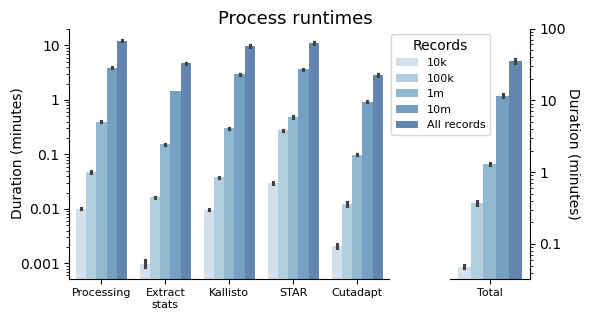

In [30]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Define a custom palette with specific colors assigned to each category
custom_palette_dict = {
    "10k": "#deebf7",
    "100k": "#c6dbef",
    "1m": "#9ecae1",
    "10m": "#6baed6",
    "All records": "#2171b5"
}
blues_palette = sns.color_palette("Blues", n_colors=6)[1:]
blues_palette_5 = blues_palette[:5]
custom_palette = [custom_palette_dict[rec] for rec in ["10k", "100k", "1m", "10m", "All records"]]

# Create a figure with two subplots with custom width ratios
fig, (ax_f, ax_g) = plt.subplots(1, 2, figsize=(6, 3.5), gridspec_kw={'width_ratios': [80, 20]})  # 4:1 width ratio
fig.suptitle("Process runtimes", size=13, y=0.9)  # Centralized title
# Plot the first subplot (f) independently
sns.barplot(
    data=data_5, x='process', y='duration', hue='records', 
    errorbar='se', palette=blues_palette_5, alpha=0.7, ax=ax_f, 
    order=['processing_time', 'extract_time', 'kallisto_time', 'align_time', 'cutadapt_time']
)
ax_f.set_xlabel("")
ax_f.set_ylabel('Duration (minutes)',labelpad=-3)
ax_f.set_xticklabels(["Processing", "Extract\nstats", 
                      "Kallisto", "STAR", 
                      "Cutadapt"], rotation=0, size=8)
ax_f.legend_.remove()

# Set y-axis to log scale for the first plot
ax_f.set_yscale('log')

# Manually set y-ticks and y-tick labels for the first plot
ax_f.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax_f.set_yticklabels(['0.001', '0.01', '0.1', '1', '10'])

# Remove spines to clean up the plot
sns.despine(ax=ax_f, top=True, right=True)

# Plot the second subplot (g) independently
sns.barplot(
    data=data_total, x='process', y='duration', hue='records', 
    palette=blues_palette_5, alpha=0.7, ax=ax_g
)
ax_g.set(xlabel="", ylabel="")
ax_g.set_xticklabels(["Total"], rotation=0, size=8)

# Set y-axis to log scale for the second plot
ax_g.set_yscale('log')

# Manually set y-ticks and y-tick labels for the second plot
ax_g.set_yticks([0.1, 1, 10, 100])
ax_g.set_yticklabels(["0.1", "1", "10", "100"])

# Add labels to the second y-axis
ax_g.set_ylabel('Duration (minutes)', rotation=-90, labelpad=10)

# Move legend to the upper left corner inside the plot
# Remove spines to clean up the plot
sns.despine(ax=ax_g, top=True, left=True, right=False)
ax_g.yaxis.tick_right()
ax_g.yaxis.set_label_position("right")

# Adjust layout so that the subplots are properly spaced
plt.tight_layout()
plt.legend(title="Records", loc='upper left', fontsize=18, bbox_to_anchor=(-0.8, 1), prop={'size': 8})
# Add a common title for the entire figure
#fig.suptitle('Performance metrics of SRA samples\n(n=720)', fontsize=14,  y=1.05)
# Save the combined figure with both subplots
plt.savefig("1030_final_plots/1C_1_perf_test_results_combined.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1C_1_perf_test_results_combined.svg", format="svg", dpi=250, bbox_inches='tight')
plt.show()

### Figure 1. D

In [72]:
directory = (Path().resolve() /
             "results_htsinfer")

# Initialize an empty list to store individual dataframes
dfs = []

records_order = ["10k", "100k", "1m", "10m", "0def"]

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith("_result.csv"):
        # Extract the relevant part of the filename
        records = filename.split("_")[5]
        
        # Read the CSV file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        df = df[['sample', 'match_org', 'match_orient', 'match_adapter', 'match_length']]

        # Add a new column with the records information
        df['records'] = records

        # Append the modified dataframe to the list
        dfs.append(df)       

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Order dataframe according to 'records'
data_ordered = data.set_index('records')
data_ordered = data_ordered.reset_index()
data_ordered['records'] = pd.Categorical(data_ordered['records'], categories=records_order)

data_ordered = data_ordered.sort_values(['records'])

In [73]:
data_ordered['records'] = data_ordered['records'].replace({'0def': 'All records'})
data_ordered['match_org'] = data_ordered['match_org'].replace({'Undecided': 'Unassigned'})
data_ordered['match_org'] = data_ordered['match_org'].replace({'Match': 'Agreement'})
data_ordered['match_org'] = data_ordered['match_org'].replace({'Mismatch': 'Disagreement'})

In [74]:
data_ordered

,records,sample,match_org,match_orient,match_adapter,match_length
0,10k,SRR582892,Unassigned,Unassigned,No_metadata,Match
475,10k,SRR11148845,Agreement,No_metadata,No_metadata,Match
476,10k,SRR10901764,Agreement,Unassigned,No_metadata,Match
477,10k,SRR10901806,Agreement,Unassigned,No_metadata,Match
478,10k,SRR10901775,Agreement,Unassigned,No_metadata,Match
...,...,...,...,...,...,...
1916,All records,SRR10901764,Agreement,No_metadata,No_metadata,Match
1915,All records,SRR11148845,Agreement,No_metadata,No_metadata,Match
1914,All records,SRR11148847,Agreement,No_metadata,Unassigned,Match
1934,All records,SRR18675582,Agreement,No_metadata,No_metadata,Match


In [75]:
colors = {
    'Agreement': "#1a9850", 
    'Disagreement': "#d73027", 
    'Unassigned': "darkgray", 
}
# Calculate the counts for each group
counts = data_ordered.groupby(['records', 'match_org']).size().reset_index(name='count')

# Calculate the percentages
df1 = data_ordered.groupby('records')['match_org'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

# Merge counts with percentages based on records and match_org
df1 = pd.merge(df1, counts, on=['records', 'match_org'])

# Display the updated dataframe
print(df1)

        records     match_org    percent  count
0           10k     Agreement  74.444444    536
1           10k    Unassigned  21.666667    156
2           10k  Disagreement   3.888889     28
3          100k     Agreement  79.583333    573
4          100k    Unassigned  18.611111    134
5          100k  Disagreement   1.805556     13
6            1m     Agreement  82.083333    591
7            1m    Unassigned  16.527778    119
8            1m  Disagreement   1.388889     10
9           10m     Agreement  81.944444    590
10          10m    Unassigned  16.666667    120
11          10m  Disagreement   1.388889     10
12  All records     Agreement  81.944444    590
13  All records    Unassigned  16.527778    119
14  All records  Disagreement   1.527778     11


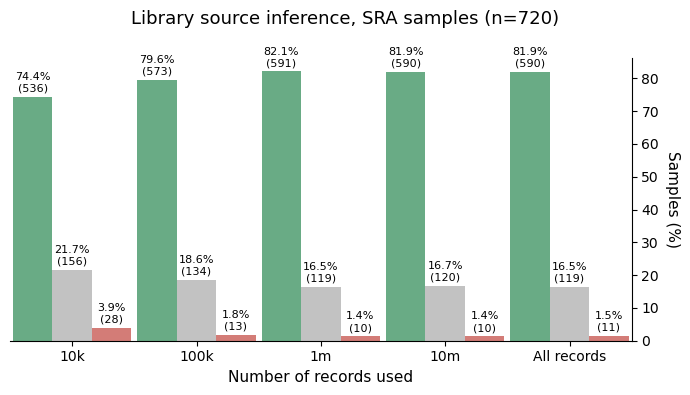

In [99]:
# Ensure records and match_org categories are ordered correctly
records_order = ["10k", "100k", "1m", "10m", "All records"]
match_org_order = ['Agreement', 'Unassigned', 'Disagreement']

# Custom colors for the match_org categories
colors = {
    'Agreement': "#1a9850",
    'Disagreement': "#d73027",
    'Unassigned': "darkgray",
}

# Creating the plot
plt.figure(figsize=(7, 4))
plt.suptitle("Library source inference, SRA samples (n=720)", size=13, y=0.975)  # Centralized title
ax = sns.barplot(
    data=df1,
    x='records',
    y='percent',
    hue='match_org',
    palette=colors,
    hue_order=match_org_order,  # Ensure the bars are ordered as Agreement, Disagreement, Unassigned
    order=records_order,
    alpha=0.7,
    width=0.95
)

# Sort df1 by records and match_org to ensure the annotation order matches the bar order
df1_sorted = df1.sort_values(by=['records', 'match_org'], key=lambda x: x.map({k: i for i, k in enumerate(match_org_order)}))

# Display the percentage and count values on top of each bar
for p, (percent, count) in zip(ax.patches, zip(df1_sorted['percent'], df1_sorted['count'])):
    # Offset values can be adjusted for proper positioning
    offset = (0, 10)
    ax.annotate(
        f'{percent:.1f}%\n({count})',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=offset,
        textcoords='offset points',
        fontsize=8  # Adjust this value to make the labels smaller
    )

# Set axis labels and title
plt.ylabel('Samples (%)', size=11, rotation=-90, labelpad=15)
ax.set_xlabel('Number of records used', size=11)

# Move y-axis to the right side and remove from the left
ax.yaxis.tick_right()  # Move ticks to the right
ax.yaxis.set_label_position("right")  # Set the y-axis label position to the right
ax.spines['left'].set_visible(False)  # Hide the left spine
ax.spines['right'].set_visible(True)  # Ensure the right spine is visible

# Remove ticks on the left
ax.tick_params(left=True)

# Remove the top and right spines
sns.despine(ax=ax, top=True, left=True, right=False)
# Adjust legend and layout
# ax.legend(title='Category', loc='upper right')
plt.legend([],[], frameon=False)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.savefig("1030_final_plots/1C_2_SRA_samples_organism_matches.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1C_2_SRA_samples_organism_matches.svg", format="svg", dpi=250, bbox_inches='tight')
plt.show()

### Figure 1. D1

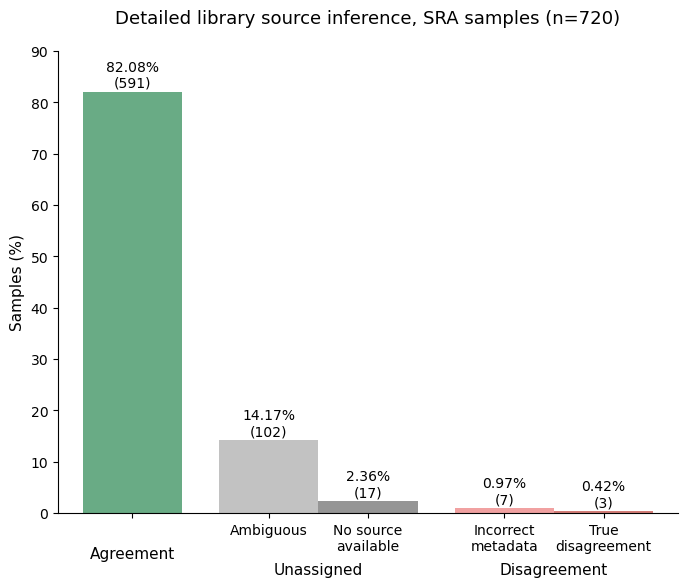

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated dictionary with split categories
d = {
    'Agreement': 591, 
    'Undecided: low ratio': 102, 
    'Undecided: no source available': 17,
    'Disagreement: wrong metadata': 7, 
    'Disagreement: true': 3, 
}
colors = {
    'Agreement': "#1a9850", 
    'Disagreement: true': "#d73027", 
    'Disagreement: wrong metadata': "#FF6666", 
    'Undecided: low ratio': "darkgray", 
    'Undecided: no source available': "dimgray"
}

# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a DataFrame for seaborn with percentages
df = pd.DataFrame(list(percentages.items()), columns=['Category', 'Percentage'])

# Create a custom order for categories to group them
order = ['Agreement', 'Undecided: low ratio', 'Undecided: no source available', 'Disagreement: wrong metadata', 'Disagreement: true', ]

# Create a bar plot using seaborn with percentages
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)

# Add labels and title
plt.ylabel('Samples (%)', size=11)
plt.xlabel('')

# Adjust positions for grouped categories manually to group them closer
offsets = [-0.3, 0.8, 1.6, 2.7, 3.5]
for bar, new_x in zip(ax.patches, offsets):
    bar.set_x(new_x)

# Display the percentage and count values on top of each bar
for i, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages.values(), d.values()))):
    offset = (0, 12)
    ax.annotate(f'{percent:.2f}%\n({count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=offset, textcoords='offset points')

# Manually set the y-axis limit
plt.ylim(0, 90)  # Adjusted to 100 for percentage

# Manually set the x-axis ticks and labels for subcategories
ax.set_xticks([0.1, 1.2, 2, 3.1, 3.9])
ax.set_xticklabels(['', 'Ambiguous', 'No source\navailable', 'Incorrect\nmetadata', 'True\ndisagreement'], rotation=0, size=10)

# Add meta-labels for groups
plt.text(0.1, -8, 'Agreement', ha='center', va='center', fontsize=11)
plt.text(1.6, -11, 'Unassigned', ha='center', va='center', fontsize=11)
plt.text(3.5, -11, 'Disagreement', ha='center', va='center', fontsize=11)

# Adjust the spacing of meta-labels
plt.gca().annotate("", xy=(0.6, -5), xycoords='data', xytext=(2.8, -5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1.5))
plt.gca().annotate("", xy=(3.3, -5), xycoords='data', xytext=(5.0, -5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1.5))

# Remove the top and right spines
sns.despine(ax=ax, top=True, left=False, right=True)
plt.title("Detailed library source inference, SRA samples (n=720)", pad=20, size=13)
plt.savefig("1030_final_plots/1D_1_SRA_samples_lib_source.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1D_1_SRA_samples_lib_source.svg", format="svg", dpi=250, bbox_inches='tight')
# Show the plot
plt.show()

### Figure 1. D2

/scratch/balajt0000/slurm-job.12900958/ipykernel_2841677/766249954.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['First', 'Second', 'Third or more'], size=11)


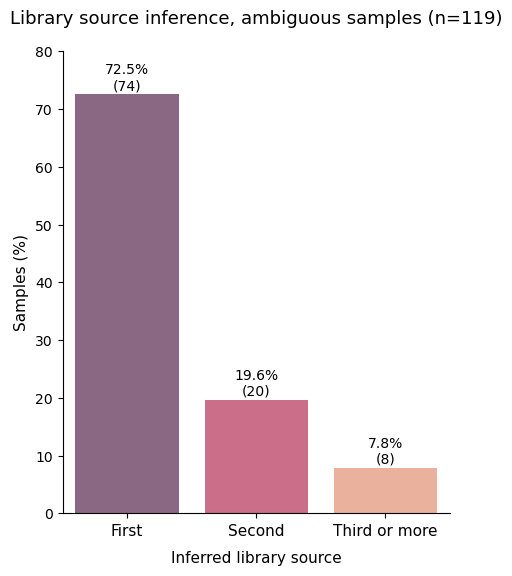

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated dictionary with split categories
d = {
    '1st source': 74, 
    '2nd source': 20,
    '3rd or more source': 8,
}

# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a DataFrame for seaborn with percentages
df = pd.DataFrame(list(percentages.items()), columns=['Category', 'Percentage'])

# Create a custom order for categories to group them
order = ['1st source', '2nd source', '3rd or more source']

# Create a bar plot using seaborn with percentages
plt.figure(figsize=(5, 6))  # Adjust the figure size
ax = sns.barplot(x='Category', y='Percentage', data=df, palette='rocket', order=order, alpha=.7)

# Add labels and title
plt.ylabel('Samples (%)', rotation = 90, size=11)
plt.xlabel('')

# Display the percentage and count values on top of each bar
for i, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages.values(), d.values()))):
    offset = (0, 12)
    ax.annotate(f'{percent:.1f}%\n({count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=offset, textcoords='offset points')

# Manually set the y-axis limit
plt.ylim(0, 80)  # Adjusted to 100 for percentage

# Set x-axis labels
ax.set_xticklabels(['First', 'Second', 'Third or more'], size=11)

# Move y-axis to the right side and remove from the left

# Remove ticks on the left
ax.tick_params(left=True)
plt.text(1, -7.8, 'Inferred library source', ha='center', va='center', fontsize=11)
# Remove the top and right spines
sns.despine(ax=ax, top=True)
plt.title("Library source inference, ambiguous samples (n=119)", pad=20, size=13)
plt.savefig("1030_final_plots/1D_2_SRA_samples_unassigned.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1D_2_SRA_samples_unassigned.svg", format="svg", dpi=250, bbox_inches='tight')

# Show the plot
plt.show()

### Figure 1. E

/scratch/balajt0000/slurm-job.12900958/ipykernel_2841677/3168366213.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Agreement', 'Unassigned', 'Disagreement'], rotation=0, size=11)


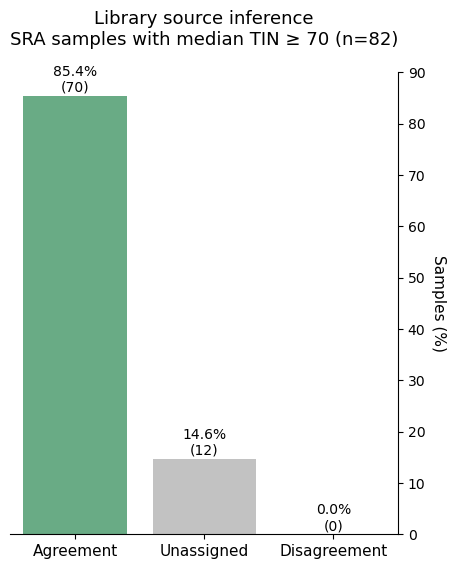

In [130]:
# Updated dictionary with split categories
d = {
    'Agreement': 70,
    'Unassigned': 12,
    'Disagreement': 0,
}
colors = {
    'Agreement': "#1a9850", 
    'Disagreement': "#d73027", 
    'Unassigned': "darkgray", 
}

# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a DataFrame for seaborn with percentages
df = pd.DataFrame(list(percentages.items()), columns=['Category', 'Percentage'])

# Create a custom order for categories to group them
order = ['Agreement', 'Unassigned', 'Disagreement']

# Create a bar plot using seaborn with percentages
plt.figure(figsize=(5, 6))  # Adjust the figure size
ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)

# Add labels and title
plt.ylabel('Samples (%)', size=11, rotation=-90, labelpad=15)
plt.xlabel('')

# Display the percentage and count values on top of each bar
for i, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages.values(), d.values()))):
    offset = (0, 12)
    ax.annotate(f'{percent:.1f}%\n({count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=offset, textcoords='offset points')

# Manually set the y-axis limit
plt.ylim(0, 90)  # Adjusted to 100 for percentage

# Set x-axis labels
ax.set_xticklabels(['Agreement', 'Unassigned', 'Disagreement'], rotation=0, size=11)
# Move y-axis to the right side and remove from the left
ax.yaxis.tick_right()  # Move ticks to the right
ax.yaxis.set_label_position("right")  # Set the y-axis label position to the right
ax.spines['left'].set_visible(False)  # Hide the left spine
ax.spines['right'].set_visible(True)  # Ensure the right spine is visible

# Remove ticks on the left
ax.tick_params(left=True)

# Remove the top and right spines
sns.despine(ax=ax, top=True, left=True, right=False)
plt.title("Library source inference\nSRA samples with median TIN ≥ 70 (n=82)", pad=20, size=13)
plt.savefig("1030_final_plots/1E_SRA_high_quality_samples_lib_source.png", dpi=250, bbox_inches='tight')
plt.savefig("1030_final_plots/1E_SRA_high_quality_samples_lib_source.svg", format="svg", dpi=250, bbox_inches='tight')

# Show the plot
plt.show()

/scratch/balajt0000/slurm-job.9953928/ipykernel_2269083/3511459706.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Percentage', data=df, palette='rocket', order=order, alpha=.7)
/scratch/balajt0000/slurm-job.9953928/ipykernel_2269083/3511459706.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1st source', '2nd source', '3rd or more source', 'Ambiguous (none)'], rotation=45, size=11, ha='right')


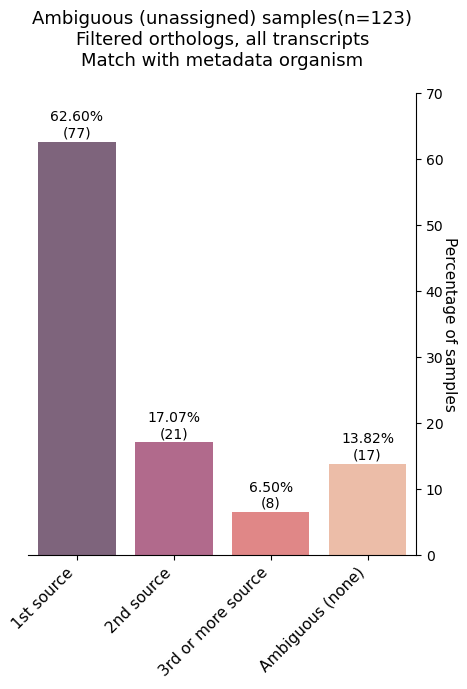

### Other

/scratch/balajt0000/slurm-job.9953928/ipykernel_2269083/1578683923.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)
/scratch/balajt0000/slurm-job.9953928/ipykernel_2269083/1578683923.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


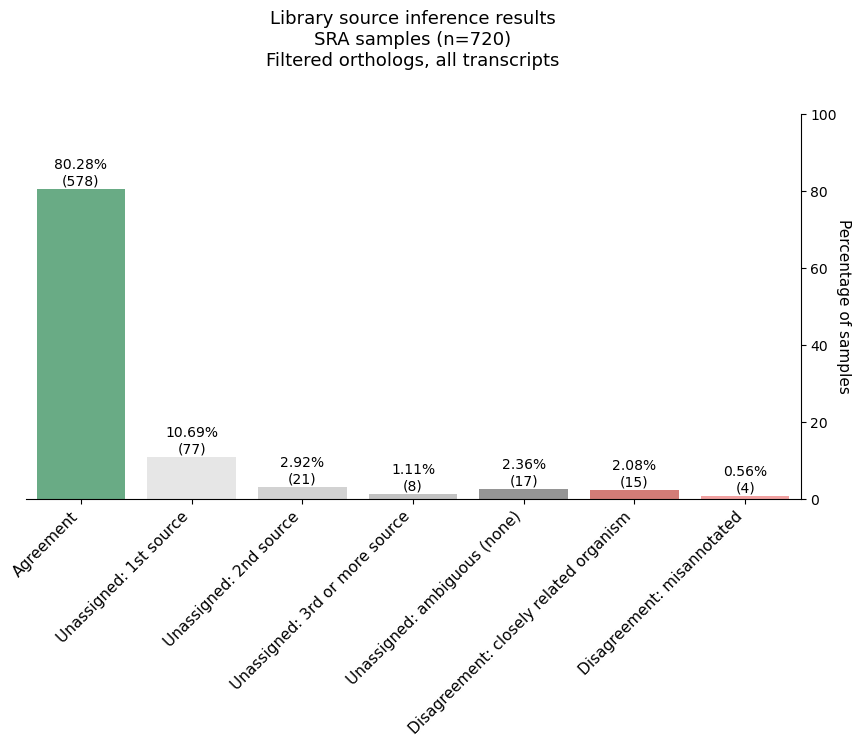

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated dictionary with split categories
d = {
    'Agreement': 578,
    'Unassigned: 1st source': 77,
    'Unassigned: 2nd source': 21,
    'Unassigned: 3rd or more source': 8,
    'Unassigned: ambiguous (none)': 17,
    'Disagreement: closely related organism': 15,
    'Disagreement: misannotated': 4
}
colors = {
    'Agreement': "#1a9850",
    'Unassigned: 1st source': "gainsboro",
    'Unassigned: 2nd source': "silver",
    'Unassigned: 3rd or more source': "darkgray",
    'Unassigned: ambiguous (none)': "dimgray",
    'Disagreement: closely related organism': "#d73027",
    'Disagreement: misannotated': "#FF6666"
}
# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a DataFrame for seaborn with percentages
df = pd.DataFrame(list(percentages.items()), columns=['Category', 'Percentage'])

# Create a custom order for categories to group them
order = [
    'Agreement', 'Unassigned: 1st source', 'Unassigned: 2nd source',
    'Unassigned: 3rd or more source', 'Unassigned: ambiguous (none)',
    'Disagreement: closely related organism', 'Disagreement: misannotated'
]

# Create a bar plot using seaborn with percentages
plt.figure(figsize=(10, 5))  # Adjust the figure size
ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)

# Add labels and title
plt.ylabel('Percentage of samples', size=11, rotation=-90, labelpad=10)
plt.xlabel('')

# Display the percentage and count values on top of each bar
for i, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages.values(), d.values()))):
    offset = (0, 12)
    ax.annotate(f'{percent:.2f}%\n({count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=offset, textcoords='offset points')

# Manually set the y-axis limit
plt.ylim(0, 100)  # Adjusted to 100 for percentage

# Set x-axis labels
ax.set_xticklabels([
    'Agreement', 'Unassigned: 1st source', 'Unassigned: 2nd source',
    'Unassigned: 3rd or more source', 'Unassigned: ambiguous (none)',
    'Disagreement: closely related organism', 'Disagreement: misannotated'
], rotation=45, size=11, ha='right')

# Move y-axis to the right side and remove from the left
ax.yaxis.tick_right()  # Move ticks to the right
ax.yaxis.set_label_position("right")  # Set the y-axis label position to the right
ax.spines['left'].set_visible(False)  # Hide the left spine
ax.spines['right'].set_visible(True)  # Ensure the right spine is visible

# Remove ticks on the left
ax.tick_params(left=True)

# Remove the top and right spines
sns.despine(ax=ax, top=True, left=True, right=False)
plt.title("Library source inference results\nSRA samples (n=720)\nFiltered orthologs, all transcripts\n", pad=20, size=13)
plt.savefig("1017_plots/6_filtered_orthologs_all_transcripts_final.png", dpi=250, bbox_inches='tight')

# Show the plot
plt.show()

/scratch/balajt0000/slurm-job.9953928/ipykernel_2269083/3749047972.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)


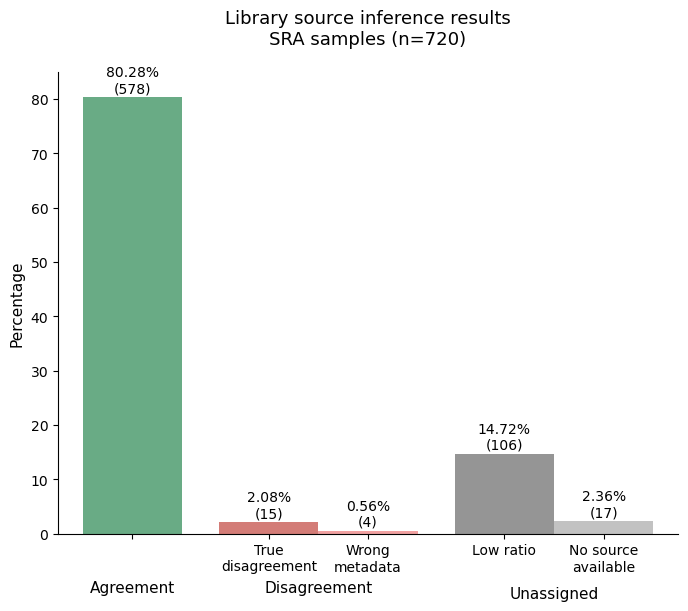

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated dictionary with split categories
d = {
    'Agreement': 578, 
    'Disagreement: true': 15, 
    'Disagreement: wrong metadata': 4, 
    'Undecided: low ratio': 106, 
    'Undecided: no source available': 17
}
colors = {
    'Agreement': "#1a9850", 
    'Disagreement: true': "#d73027", 
    'Disagreement: wrong metadata': "#FF6666", 
    'Undecided: low ratio': "dimgray", 
    'Undecided: no source available': "darkgray"
}

# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a DataFrame for seaborn with percentages
df = pd.DataFrame(list(percentages.items()), columns=['Category', 'Percentage'])

# Create a custom order for categories to group them
order = ['Agreement', 'Disagreement: true', 'Disagreement: wrong metadata', 'Undecided: low ratio', 'Undecided: no source available']

# Create a bar plot using seaborn with percentages
plt.figure(figsize=(8, 6))  # Adjust the figure size
ax = sns.barplot(x='Category', y='Percentage', data=df, palette=colors, order=order, alpha=.7)

# Add labels and title
plt.ylabel('Percentage', size=11)
plt.xlabel('')

# Adjust positions for grouped categories manually to group them closer
offsets = [-0.3, 0.8, 1.6, 2.7, 3.5]
for bar, new_x in zip(ax.patches, offsets):
    bar.set_x(new_x)

# Display the percentage and count values on top of each bar
for i, (p, (percent, count)) in enumerate(zip(ax.patches, zip(percentages.values(), d.values()))):
    offset = (0, 12)
    ax.annotate(f'{percent:.2f}%\n({count})', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=offset, textcoords='offset points')

# Manually set the y-axis limit
plt.ylim(0, 85)  # Adjusted to 100 for percentage

# Manually set the x-axis ticks and labels for subcategories
ax.set_xticks([0.1, 1.2, 2, 3.1, 3.9])
ax.set_xticklabels(['', 'True\ndisagreement', 'Wrong\nmetadata', 'Low ratio', 'No source\navailable'], rotation=0, size=10)

# Add meta-labels for groups
plt.text(0.1, -10, 'Agreement', ha='center', va='center', fontsize=11)
plt.text(1.6, -10, 'Disagreement', ha='center', va='center', fontsize=11)
plt.text(3.5, -11, 'Unassigned', ha='center', va='center', fontsize=11)

# Adjust the spacing of meta-labels
plt.gca().annotate("", xy=(0.6, -5), xycoords='data', xytext=(2.8, -5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1.5))
plt.gca().annotate("", xy=(3.3, -5), xycoords='data', xytext=(5.0, -5),
            arrowprops=dict(arrowstyle="-", color='black', lw=1.5))

# Remove the top and right spines
sns.despine(ax=ax, top=True, left=False, right=True)
plt.title("Library source inference results\nSRA samples (n=720)", pad=20, size=13)
plt.savefig("1017_plots/6_1_SRA_samples_lib_source.png", dpi=250, bbox_inches='tight')
# Show the plot
plt.show()